# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,Unit_Price,Total_Price,Discount,Quantity,Customer_Type,Cluster
0,1.87,124.54,0.10,74.0,B2B,1
1,1.87,31.98,0.05,18.0,B2B,3
2,1.64,6.56,0.00,4.0,B2C,0
3,1.74,8.70,0.00,5.0,B2C,0
4,1.80,27.00,0.00,15.0,B2C,0


In [3]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50411 entries, 0 to 50410
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     50411 non-null  float64
 1   Total_Price    50411 non-null  float64
 2   Discount       50411 non-null  float64
 3   Quantity       50411 non-null  float64
 4   Customer_Type  50411 non-null  object 
 5   Cluster        50411 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.3+ MB


In [4]:
# Cek missing value
df.isnull().sum()

,0
Unit_Price,0
Total_Price,0
Discount,0
Quantity,0
Customer_Type,0
Cluster,0


In [5]:
# Cek jumlah duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah duplikat sebelum penghapusan: {duplicate_count}")

# Hapus data duplikat
df = df.drop_duplicates()

# Cek jumlah duplikat setelah penghapusan
duplicate_count_after = df.duplicated().sum()
print(f"Jumlah duplikat setelah penghapusan: {duplicate_count_after}")

# Jumlah baris dan kolom sekarang
print("Jumlah baris dan kolom sekarang:", df.shape)

Jumlah duplikat sebelum penghapusan: 28716
Jumlah duplikat setelah penghapusan: 0
Jumlah baris dan kolom sekarang: (21695, 6)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21695 entries, 0 to 50410
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     21695 non-null  float64
 1   Total_Price    21695 non-null  float64
 2   Discount       21695 non-null  float64
 3   Quantity       21695 non-null  float64
 4   Customer_Type  21695 non-null  object 
 5   Cluster        21695 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ MB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Pisahkan fitur dan target
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

# Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=["number"]).columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# One-Hot Encoding untuk fitur kategorikal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_categorical = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]), columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_categorical = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoder.get_feature_names_out(), index=X_test.index)

# Gabungkan kembali fitur numerik dan kategorikal
X_train = pd.concat([X_train[numerical_cols], X_train_categorical], axis=1)
X_test = pd.concat([X_test[numerical_cols], X_test_categorical], axis=1)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Sample X_train:\n", X_train.head())

Shape X_train: (17356, 6)
Shape X_test: (4339, 6)
Sample X_train:
        Unit_Price  Total_Price  Discount  Quantity  Customer_Type_B2B  \
17537   -0.310829     0.709107  1.900220  1.339624                1.0   
7614    -1.081248    -1.085029 -0.650652 -0.883689                1.0   
27982   -0.374151     0.766636 -0.650652  1.232044                1.0   
6930    -0.606332    -1.202940 -1.926087 -1.349868                0.0   
24909   -0.479688    -0.515235  0.624784 -0.309931                1.0   

       Customer_Type_B2C  
17537                0.0  
7614                 0.0  
27982                0.0  
6930                 1.0  
24909                0.0  


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


- K-Nearest Neighbors (KNN) adalah metode supervised learning yang digunakan untuk mengatasi masalah klasifikasi dan regresi. Algoritma ini digunakan untuk mengklasifikasikan data baru berdasarkan kedekatannya dengan data yang sudah diberi label dalam dataset pelatihan.
- Decision Tree adalah algoritma machine learning yang sering digunakan dalam tugas klasifikasi dan regresi. Struktur dari algoritma ini mirip dengan bentuk pohon dengan setiap cabang mewakili keputusan atau percabangan dari data berdasarkan fitur-fitur yang ada.
- Random Forest adalah algoritma ensemble learning yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi prediksi dan mengurangi risiko overfitting. Tujuan utama Random Forest adalah mengatasi kelemahan Decision Tree yang cenderung overfit terhadap data pelatihan.
- Support vector machine (SVM) adalah salah satu algoritma machine learning yang digunakan untuk klasifikasi dan regresi. Namun, SVM lebih sering digunakan pada masalah klasifikasi. SVM bekerja dengan mencari hyperplane yang optimal untuk memisahkan data ke dalam kelas-kelas yang berbeda.
- Naive Bayes adalah algoritma klasifikasi berbasis probabilitas yang berdasarkan pada Teorema Bayes, dengan asumsi bahwa fitur-fitur dalam data bersifat independen satu sama lain. Naive Bayes menggunakan prinsip probabilitas untuk memprediksi kelas dari data baru berdasarkan pengamatan fitur yang ada.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model: KNN
Accuracy: 0.9945
Precision: 0.9945
Recall: 0.9945
F1-Score: 0.9945

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.99      1.00      1826
           2       0.99      0.97      0.98       280
           3       0.99      1.00      1.00      1973

    accuracy                           0.99      4339
   macro avg       0.99      0.99      0.99      4339
weighted avg       0.99      0.99      0.99      4339



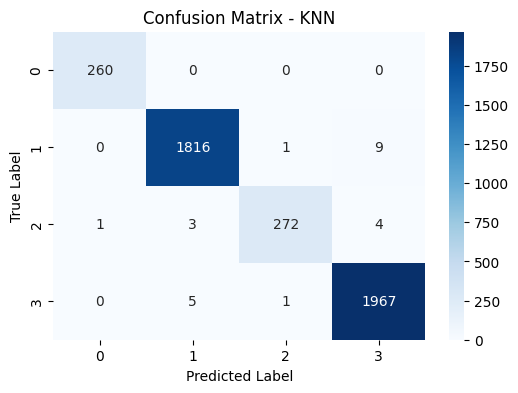



Evaluasi Model: Decision Tree
Accuracy: 0.9924
Precision: 0.9924
Recall: 0.9924
F1-Score: 0.9924

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       260
           1       0.99      0.99      0.99      1826
           2       0.99      0.97      0.98       280
           3       0.99      1.00      0.99      1973

    accuracy                           0.99      4339
   macro avg       0.99      0.99      0.99      4339
weighted avg       0.99      0.99      0.99      4339



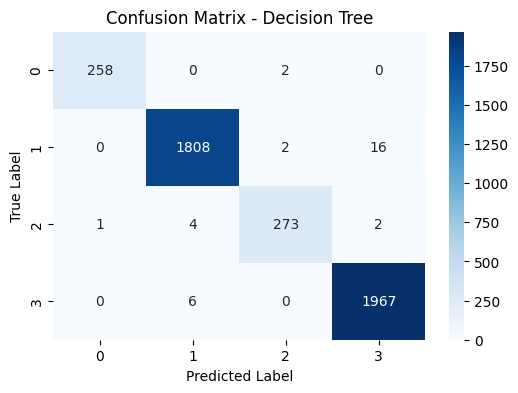



Evaluasi Model: Random Forest
Accuracy: 0.9959
Precision: 0.9959
Recall: 0.9959
F1-Score: 0.9958

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.99      1.00      1826
           2       0.99      0.99      0.99       280
           3       0.99      1.00      1.00      1973

    accuracy                           1.00      4339
   macro avg       1.00      0.99      1.00      4339
weighted avg       1.00      1.00      1.00      4339



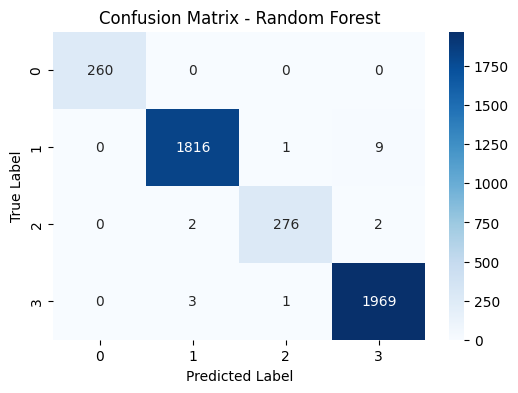



Evaluasi Model: SVM
Accuracy: 0.9945
Precision: 0.9945
Recall: 0.9945
F1-Score: 0.9945

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00      1826
           2       1.00      0.97      0.98       280
           3       0.99      1.00      0.99      1973

    accuracy                           0.99      4339
   macro avg       1.00      0.99      0.99      4339
weighted avg       0.99      0.99      0.99      4339



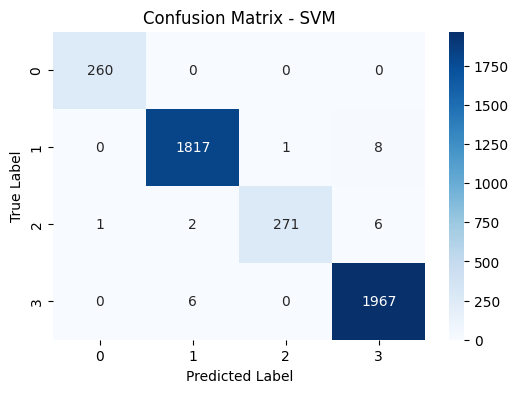



Evaluasi Model: Naive Bayes
Accuracy: 0.9279
Precision: 0.9331
Recall: 0.9279
F1-Score: 0.8991

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92       260
           1       0.93      1.00      0.96      1826
           2       1.00      0.02      0.04       280
           3       0.94      0.98      0.96      1973

    accuracy                           0.93      4339
   macro avg       0.93      0.75      0.72      4339
weighted avg       0.93      0.93      0.90      4339



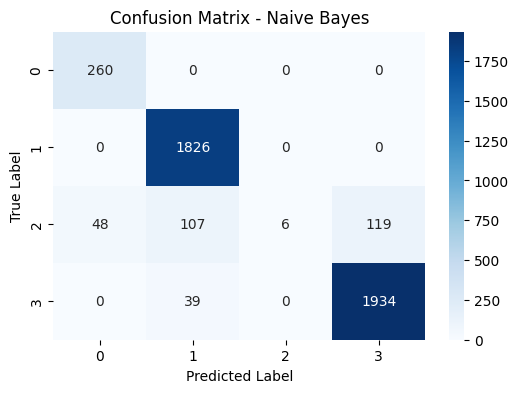

In [9]:
# Buat daftar model untuk evaluasi
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Naive Bayes": nb
}

# Evaluasi setiap model
for name, model in models.items():
    print(f"Evaluasi Model: {name}")

    # Prediksi data uji
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Tampilkan hasil evaluasi
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("\n" + "="*68 + "\n")

### KNN
KNN memiliki akurasi yang sangat tinggi, yaitu 99.45%, hanya berbeda 0.9% dibandingkan Random Forest. Dengan tingkat kesalahan prediksi hanya 0.55%, KNN berhasil mengklasifikasikan data dengan sangat baik, menghasilkan tingkat kesalahan yang sangat rendah. Model ini bekerja dengan baik karena KNN mampu mengenali pola dengan efektif dalam dataset ini, terutama dengan jumlah data yang besar.
### Decision Tree
Decision Tree memiliki akurasi 99.29%, hanya berbeda 0.25% dibandingkan dengan Random Forest. Meskipun perbedaannya kecil, Decision Tree lebih rentan terhadap overfitting.
### Random Forest
Dari hasil evaluasi, Random Forest menjadi model dengan kinerja terbaik dengan akurasi tertinggi sebesar 99.54%, hanya memiliki kesalahan prediksi sekitar 0.46% dari total data uji. Model ini bekerja sangat baik karena menggunakan metode ensemble learning, di mana keputusan akhir dibuat berdasarkan kombinasi banyak pohon keputusan, sehingga mengurangi risiko overfitting. Confusion matrix menunjukkan bahwa model ini hampir sempurna dalam mengklasifikasikan semua kelas dengan jumlah kesalahan yang sangat minim.
### SVM
Sama seperti KNN, Kedua model ini memiliki akurasi yang sangat tinggi, yaitu 99.45%, hanya berbeda 0.9% dibandingkan Random Forest. Dengan tingkat kesalahan prediksi hanya 0.55%.
### Naive Bayes
Dari semua model yang diuji, Naive Bayes memiliki akurasi paling rendah, yaitu 92.79%, berbeda sekitar 6.75% dibandingkan Random Forest. Dari confusion matrix, terlihat bahwa model ini mengalami banyak kesalahan klasifikasi, terutama pada kelas ke-2, di mana banyak data diklasifikasikan dengan salah. Model ini bekerja berdasarkan asumsi bahwa setiap fitur dalam data bersifat independen, yang kemungkinan besar tidak sepenuhnya berlaku dalam dataset yang digunakan.

### Kesimpulan
- Berdasarkan evaluasi terhadap lima model klasifikasi, Random Forest adalah model terbaik untuk dataset ini, dengan akurasi tertinggi sebesar 99.54%.
- Selain itu, KNN dan SVM juga menunjukkan performa yang sangat baik, dengan akurasi 99.45%, hanya sedikit lebih rendah dibandingkan Random Forest.
- Naive Bayes memiliki performa paling rendah dengan akurasi 92.79% dan mengalami banyak kesalahan klasifikasi, terutama pada kelas ke-2. Model ini kurang cocok digunakan pada dataset ini karena tidak dapat menangani ketergantungan antar fitur dengan baik.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
# Dictionary untuk menyimpan hasil tuning
best_params = {}
best_scores = {}

# 1. Random Forest
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gs_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1)
gs_rf.fit(X_train, y_train)
best_params['Random Forest'] = gs_rf.best_params_
best_scores['Random Forest'] = gs_rf.best_score_

# 2. K-Nearest Neighbors (KNN)
knn_params = {
    'n_neighbors': [3, 5, 6, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
gs_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
gs_knn.fit(X_train, y_train)
best_params['KNN'] = gs_knn.best_params_
best_scores['KNN'] = gs_knn.best_score_

# 3. Decision Tree
dt_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
gs_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1)
gs_dt.fit(X_train, y_train)
best_params['Decision Tree'] = gs_dt.best_params_
best_scores['Decision Tree'] = gs_dt.best_score_

# 4. Support Vector Machine (SVM)
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
gs_svm = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
gs_svm.fit(X_train, y_train)
best_params['SVM'] = gs_svm.best_params_
best_scores['SVM'] = gs_svm.best_score_

# 5. Naive Bayes (Tidak perlu tuning karena parameter terbatas)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
best_params['Naive Bayes'] = 'Default Parameters'
best_scores['Naive Bayes'] = nb_model.score(X_train, y_train)

# Menampilkan hasil tuning
for model in best_params.keys():
    print(f"Best parameters for {model}: {best_params[model]}")
    print(f"Best score: {best_scores[model]:.4f}\n")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9951

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Best score: 0.9949

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9920

Best parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.9994

Best parameters for Naive Bayes: Default Parameters
Best score: 0.9237



Dari hasil tuning, SVM memiliki kombinasi hyperparameter terbaik dengan score 99.94%, lalu Random Forest yang memiliki score 99.51%

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Model Setelah Tuning:

Model: SVM
 - Accuracy: 0.9995
 - Precision: 0.9995
 - Recall: 0.9995
 - F1-Score: 0.9995

Classification Report - SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00      1826
           2       1.00      1.00      1.00       280
           3       1.00      1.00      1.00      1973

    accuracy                           1.00      4339
   macro avg       1.00      1.00      1.00      4339
weighted avg       1.00      1.00      1.00      4339



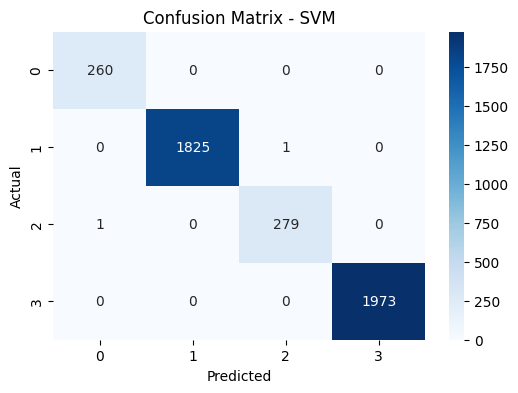



Model: Random Forest
 - Accuracy: 0.9954
 - Precision: 0.9954
 - Recall: 0.9954
 - F1-Score: 0.9954

Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.99      1.00      1826
           2       0.99      0.98      0.99       280
           3       0.99      1.00      1.00      1973

    accuracy                           1.00      4339
   macro avg       1.00      0.99      0.99      4339
weighted avg       1.00      1.00      1.00      4339



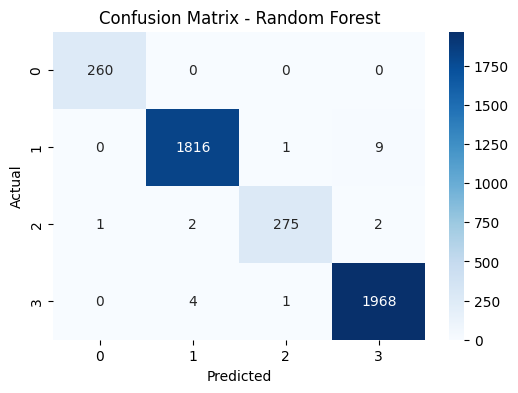

In [11]:
# Inisialisasi model dengan hyperparameter terbaik yang telah ditemukan
svm_tuned = SVC(C=100, gamma='scale', kernel='linear').fit(X_train, y_train)
rf_tuned = RandomForestClassifier(max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=200).fit(X_train, y_train)

# Evaluasi model setelah tuning
models = {'SVM': svm_tuned, 'Random Forest': rf_tuned}

print("Evaluasi Model Setelah Tuning:\n")

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {name}")
    print(f" - Accuracy: {accuracy:.4f}")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1-Score: {f1:.4f}\n")

    # Classification Report
    print(f"Classification Report - {name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("\n" + "="*68 + "\n")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Perbandingan hasil evaluasi sebelum dan setelah tuning

- Sebelum tuning  

**SVM**  
Accuracy: 0.9945  
Precision: 0.9945  
Recall: 0.9945  
F1-Score: 0.9945  

**Random Forest**  
Accuracy: 0.9959  
Precision: 0.9959  
Recall: 0.9959  
F1-Score: 0.9958

- Setelah tuning

**SVM**  
Accuracy: 0.9995  
Precision: 0.9995  
Recall: 0.9995  
F1-Score: 0.9995  

**Random Forest**  
Accuracy: 0.9954  
Precision: 0.9954  
Recall: 0.9954  
F1-Score: 0.9954  

SVM mengalami peningkatan signifikan dalam semua metrik evaluasi setelah tuning, dengan accuracy meningkat dari 99.45% menjadi 99.95%. Ini menunjukkan bahwa pemilihan hyperparameter yang lebih optimal meningkatkan kinerja model secara keseluruhan.

Random Forest justru terlihat sedikit penurunan pada seluruh metrik setelah tuning.  

Tuning berdampak sangat positif terhadap performa SVM, namun tidak terlalu menguntungkan bagi Random Forest. Oleh karena itu, SVM menjadi pilihan model terbaik setelah dilakukan tuning.



### Identifikasi kelemahan model

- KNN dan Decision Tree memiliki performa yang cukup baik, tetapi recall untuk kelas 2 lebih rendah dibandingkan kelas lain (~0.97–0.98). Hal ini menunjukkan bahwa model masih kesulitan mengenali beberapa sampel dari kelas tersebut. Decision Tree juga berpotensi mengalami overfitting, terutama jika tidak dibatasi kedalamannya.
- Random Forest dan SVM menunjukkan performa yang lebih stabil dengan hasil evaluasi yang tinggi. Namun, recall untuk kelas 2 pada Random Forest masih sedikit lebih rendah dibandingkan kelas lainnya, meskipun secara keseluruhan model ini tetap unggul.
- Naive Bayes memiliki kelemahan signifikan, terutama dalam mengenali kelas 2, dengan recall hanya 0.02. Ini menunjukkan bahwa model mengalami underfitting dan tidak mampu mempelajari pola data dengan baik.

### Rekomendasi lanjutan
- Jika ada kelas dengan precision atau recall yang lebih rendah (misalnya kelas 2 pada beberapa model), bisa dicoba oversampling (SMOTE) atau undersampling untuk menyeimbangkan jumlah sampel antar kelas.
- Jika dataset masih terbatas, mengumpulkan lebih banyak data, terutama untuk kelas yang jumlah sampelnya lebih sedikit, dapat membantu meningkatkan akurasi model.